# Hardy's Paradox

This variant of Hardy's Paradox is a relatively simple example for an entangled qubit state that could not be reproduced by a few classical bits and a random number generator. It shows that quantum variables aren't just classical variables with some randomness bundled in. There are no "hidden, local variables".
Especially, this paradox shows that classical reasoning is not applicable in quantum systems or in D. Mermins words: "What didn't happen, didn't happen". Meaning: We cannot infer the previous state of qubits by looking at the non-deterministic results of measurements. This also means that we cannot conclude hypothetical circuits that _never happened_ from our measurement. _We cannot infer something that didn't happen from something that happened._

See D. Mermins book [Quantum Computer Science: An Introduction](https://library.uoh.edu.iq/admin/ebooks/22831-quantum_computer_science.pdf) for more information.

Hardy's Paradox nicely illustrates the fundamental difference of Quantum Mechanics and classical physics. In particular, it can be used to discuss the claim made by Einstein, Podolsky and Rosen ("EPR") back in 1935. They objected to the uncertainty seen in quantum mechanics, and thought it meant that the theory was incomplete. They thought that a qubit should always have a determined output (regardless of the measurement basis), and that it only seems random because some information is hidden from us. In this case, all axes are [complementary observables](https://doi.org/10.1007/s10701-019-00261-3). They describe a property of quantum mechanics where each observable can be observed on its own but when trying to measure multiple at once, uncertainties arise. This essentially dates back to Heisenberg uncertainty principle.
As Einstein did not believe this, he said: "God does not play dice with the universe".

The idea and part of the source code for this tutorial was published in a previous version of the [Qiskit Textbook](https://qiskit.org/textbook/), in the (now removed) chapter [The Unique Properties of Qubits](https://github.com/Qiskit/qiskit-textbook/blob/master/content/ch-states/old-unique-properties-qubits.ipynb).

(hit space or right arrow to move to next slide)

## Usage instructions for the user interface
* "Ctrl -" and "Ctrl +" (or "command -", "command +") adjust the zoom level to fit the text to the browser window
* Use "space" and "shift  space" to navigate through the slides 
* "Shift Enter" executes the interactive cells (might need to click the cell, first)
* Execute the interactive cells on each slide ("In [1]:", etc)
* In case a cell is not formatted correctly, try to double-click and then "Shift Enter" to re-execute
* Interactive cells can be modified, if needed
* "X" at the top left exits the slideshow and enters the jupyter notebook interface

## Manufacturing Quantum-Cars

Let's assume we build cars.
The cars have a color (red or blue) and an engine type (gasoline or diesel).

The director of the production plant ensures us that the following is always true for the first two cars that leave the plant each morning:

1. If we look at the colors of both cars, it never happens that both are red.
2. If we measure the engine type of one car to be diesel, then the other car is red.

Take a moment to think about this: Can both cars be diesel?
You probably came to the conclusion that this case is impossible. Using classical argumentation this seems obvious. Later we will discuss why this conclusion does not apply here in the quantum world. _Did you maybe infer something that didn't happen?_

Let's encode the two cars with two qubits. The colors and the engine type will be encoded by a measurement in the (standard) Z Basis and the X Basis, where 0 relates to red or gasoline and 1 relates to blue or diesel.

Or in short:

Z color: <span style="color:red">0 red</span>, <span style="color:blue">1 blue</span>

X engine type: 0 gasoline, 1: diesel

We will create a quantum state which meets the two conditions above, but still allows two diesel cars to be the first to leave the plant which obviously would be impossible in the classical world.

We now initialize the quantum circuit and create a specific state of the two qubits.

We will show that this state satisfies the two conditions mentioned before. 

We will then analyze the question if both cars can be diesel.

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import math

### Circuit creation

In the following, a specific entangled state of the two qubits will be created.

At first, a quantum register and circuit with two qubits is created.

In [2]:
# hit "shift + Enter" to execute this cell
q = QuantumRegister(2) # create a quantum register with two qubits
# create a classical register that will hold the results of the measurement
c = ClassicalRegister(2) 
qc_hardy = QuantumCircuit(q, c)

The initial $ |00\rangle $ state is now modified with several gates. We will explain the related maths in detail later (see "Calculating the Statevector $h_{end}$" at the end of this notebook).

alpha = 1.9106332362490186
Rounded alpha = 1.911


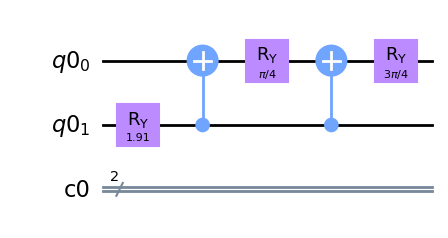

In [3]:
#STEP 1
alpha = 2*math.acos(math.sqrt(1/3))
print(f"alpha = {alpha}")
print(f"Rounded alpha = {round(alpha, 3)}")
qc_hardy.ry(alpha,q[1])
#STEP 2
qc_hardy.cx(q[1],q[0])
#STEP 3
qc_hardy.ry((1/4)*math.pi,q[0])
qc_hardy.cx(q[1],q[0])
qc_hardy.ry((3/4)*math.pi,q[0])

qc_hardy.draw(output='mpl')

Alpha $\alpha$ is chosen in a way that the quantum state becomes an **equal** distribution between the states BLUE/BLUE, BLUE/RED and RED/BLUE.

After the circuit we end up with the statevector: $ h_{end} = \begin{pmatrix}  0 \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \end{pmatrix}$

_(Reminder: This should be read as  $\begin{pmatrix}  "00" \\ "01" \\ "10" \\ "11" \end{pmatrix}$ with $q_1$ being the left and $q_0$ the right qubit. This is Qiskits normal way of ordering qubits. See more information [here](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html).)_

Which gates exactly lead to property #2 being fulfilled is not obvious. There is no simple way of calculating the necessary steps. Therefore we will just accept this circuit as given.

### Circuit interpretation

Let's see what happens if we look at the color of both cars, i.e. if we make an Z measurement on each of the qubits.

A result of 00 would indicate that both cars are red, which is not allowed by property #1.

Results for two z (=color) measurements:


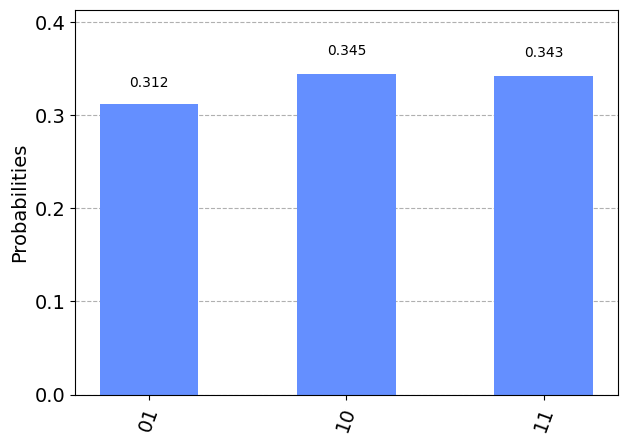

In [4]:
measurementsZZ = QuantumCircuit(q,c)
# z measurement on both qubits
measurementsZZ.measure(q[0],c[0])
measurementsZZ.measure(q[1],c[1])
qc = qc_hardy.compose(measurementsZZ, inplace=False)
print('Results for two z (=color) measurements:')
simulator = Aer.get_backend('qasm_simulator')
plot_histogram(execute(qc,simulator).result().get_counts())

The count of "00" is zero, and so these qubits do indeed satisfy property #1.

Next, let's see the results of an X-basis (engine type) measurement of $q_O$ and a Z-basis (color) measurement of $q_1$.
See the [Qiskit Textbook](https://qiskit.org/textbook/ch-labs/Lab02_QuantumMeasurement.html) for doing measurements in the X Basis, instead of the standard Z Basis.

A result of 11 would indicate that car 1 is a diesel and car two is blue, which is not allowed by property #2.

Results for an x (engine type) measurement on qubit 0 and a z (color) measurement on qubit 1:


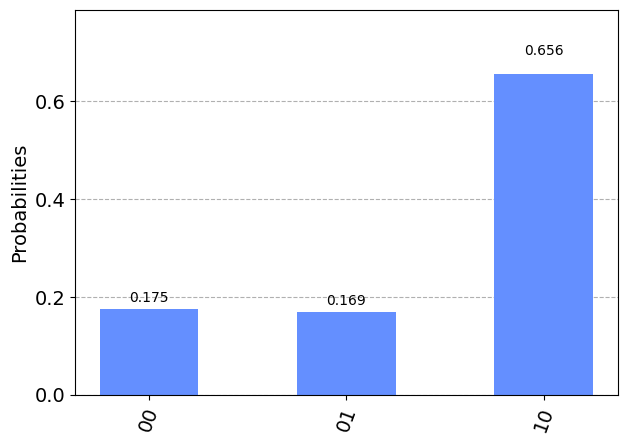

In [5]:
measurementsXZ = QuantumCircuit(q,c)
# x measurement on qubit 0
measurementsXZ.h(q[0])
measurementsXZ.measure(q[0],c[0])
# z measurement on qubit 1
measurementsXZ.measure(q[1],c[1])
qc = qc_hardy.compose(measurementsXZ, inplace=False)
print('Results for an x (engine type) measurement on qubit 0 and a z (color) measurement on qubit 1:')
plot_histogram(execute(qc,simulator).result().get_counts())

The count of "11" is zero. This means that property #2 is indeed true.

Let's prove this mathematically:

The result of a X Basis measurement on $q_0$ and a Z Basis measurement on $q_1$ can be calculated with:

$$ 
\left( I \otimes H \right) \cdot h_{end}=
\left( I \otimes H \right) \cdot
\begin{pmatrix}  0 \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \end{pmatrix} =
\left( \begin{pmatrix}  1 & 0 \\ 0 & 1 \end{pmatrix} \otimes   \frac{1}{\sqrt{2}} \begin{pmatrix}  1 & 1 \\ 1 & -1 \end{pmatrix} \right) \cdot
\begin{pmatrix}  0 \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \end{pmatrix} \\ =
\frac{1}{\sqrt{2}} \begin{pmatrix}  1 & 1 & 0 & 0 \\ 1 & -1 & 0 & 0 \\ 0 & 0 & 1 & 1 \\ 0 & 0 & 1 & -1 \end{pmatrix} \cdot
\begin{pmatrix}  0 \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \end{pmatrix} =
\frac{1}{\sqrt{2}} \begin{pmatrix}  \sqrt{\frac{1}{3}} \\ -\sqrt{\frac{1}{3}} \\ 2\sqrt{\frac{1}{3}} \\  0 \end{pmatrix} =
\begin{pmatrix}  \sqrt{\frac{1}{6}} \\ \sqrt{\frac{1}{6}} \\ \sqrt{\frac{2}{3}} \\  0 \end{pmatrix} $$

If we also show that the same is true if we measure the other way around (so measuring the X-basis of $q_1$), we have shown that the cars (qubits) satisfy property #2.

Results for an z (color) measurement on qubit 0 and a x (engine type) measurement on qubit 1:


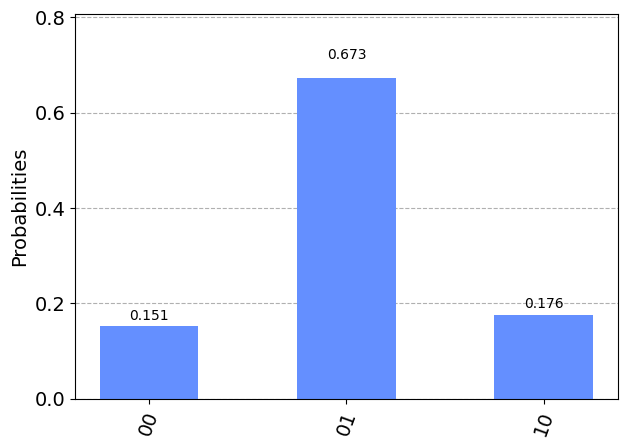

In [6]:
measurementsZX = QuantumCircuit(q,c)
# z measurement on qubit 0
measurementsZX.measure(q[0],c[0])
# x measurement on qubit 1
measurementsZX.h(q[1])
measurementsZX.measure(q[1],c[1])
qc = qc_hardy.compose(measurementsZX, inplace=False)
print('Results for an z (color) measurement on qubit 0 and a x (engine type) measurement on qubit 1:')
plot_histogram(execute(qc,simulator).result().get_counts())

As result "11" never occurs, property #2 also holds true. 

What can we now infer **classically** about the engine types of both cars?

Let's first recall the properties we have confirmed:

1. If we look at the colors of the cars, it never happens that both are red.
2. If the engine type of one car is diesel, then the other car is red.

Let's assume we measure the engine type for both cars and both would be diesel. Then by applying property #2, we can (classically) deduce what the result would have been if we had made color measurements instead: We would have gotten an output of red for both.

However, this result is impossible according to property #1. Classically, we can therefore conclude that it must be impossible that both cars are diesel.

But now let's do a measurement of the engine type for both cars, i.e. a measurement in the x basis for both qubits. Now we should see that it is impossible that both cars are diesel, right? 

Results for two x (engine type) measurement on both qubits:


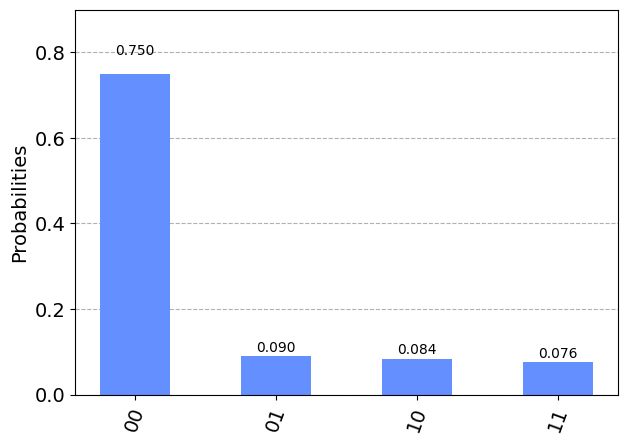

In [7]:
measurementsXX = QuantumCircuit(q,c)
measurementsXX.h(q[0])
measurementsXX.measure(q[0],c[0])
measurementsXX.h(q[1])
measurementsXX.measure(q[1],c[1])
qc = qc_hardy.compose(measurementsXX, inplace=False)
print('Results for two x (engine type) measurement on both qubits:')
plot_histogram(execute(qc,simulator).result().get_counts())

The results prove our **classical** reasoning wrong. 
To understand what happened let us first take a look at the background of the paradox.

## Background on Hardy's original Paradox


In their famous paper in 1935, EPR (Einstein, Podolsky, Rosen) essentially claimed that qubits can indeed be described by some form of classical variable. They did not know how to do it, but they were sure it could be done. Then quantum mechanics could be replaced by a theory much closer to our classical world.

It took until 1964 to show that they were wrong. J. S. Bell proved that quantum variables behaved in a way that was fundamentally unique. Since then, many new ways have been found to prove this experimentally, and extensive experiments have been done to show that this is exactly the way the universe works on a quantum mechanical level. We'll now consider a simple demonstration, using a variant of Hardy’s paradox.

### A thought experiment in quantum mechanics


Originally, Hardy's paradox described a thought experiment by Lucien Hardy in the area of quantum mechanics.

![experiment setup](images/Hardys_paradox.png)

_Image Source: https://en.wikipedia.org/wiki/Hardy%27s_paradox (23.09.2022)_

The experiment focuses on a particle (positron $e^+$) and its anti-particle (electron $e^-$) which interact without annihilating each other. The two particles interfere with each other by two interferometers which are arranged in a way so that the paths of both particles overlap (point $P$). Our equivalent to the two particles are the two cars.

The points marked $BS$ on the picture are beam splitters which make the passing particle go either the path $w$ or $v$ (at least in classical physics). But as these particles are quantum objects, the truth is that the particle is in a superposition between the two paths. The particle now has a $w$ and a $v$ amplitude (learn more [in the Qiskit Textbook](https://qiskit.org/textbook/ch-states/representing-qubit-states.html)).



The experiment is now set up in such a way that if each interferometer operates on its own (no overlapping paths), the measurement results at the points marked $c$ or $d$ are constant and reproducible. In particular: The positron $e^+$ always interferes constructively with itself and therefore gets detected at $c^+$. The electron $e^-$ always interferes constructively with itself and therefore gets detected at $c^-$.

If now the experiment is set up as shown in the image so that there are two paths which overlap, it is possible that two particles obstruct each other in the point $P$.
**For that, we measure the particles directly after point $P$ (detect if they are present in $u^+$ or $u^-$) and in the detectors $c$ and $d$.**

In the case that this obstruction takes place e.g. when the $w^-$ amplitude of $e^-$ obstructs the $w^+$ amplitude of $e^+$, the presence of a particle in $u^-$ but **not** in $u^+$ is detected.

It is measured that the detectors $d^+$ and $c^+$ detect the particle $e^+$ equally (in contrast to our default case that the particle is detected only in $c^+$) because only the $v^+$ amplitude reached the second beam splitter and was split equally. The other particle $e^-$ was not affected and is therefore **only** detected in $c^-$.

Meaning: If our detectors $d^+$ or $d^-$ detect the particle, then an obstruction took place at the point $P$.

> - If $d^+$ detects a particle, the other particle is present in $u^-$ and therefore the amplitude $w^+$ of $e^+$ was obstructed.
> - If $d^-$ detects a particle, the other particle is present in $u^+$ and therefore the amplitude $w^-$ of $e^-$ was obstructed.

All of this also means that

1. It is not possible to detect the particles in $u^+$ and $u^-$ at the same time. (Because in this case one must have obstructed the other)
2. If you detect a particle in $d^+$ (or $d^-$) the other particle has to be detected in $u^-$ (or $u^+$).

These two properties directly compare to the two properties from our car plant example:

> 1. If we look at the colors of both cars, it never happens that both are red.
> 2. If we measure the engine type of one car to be diesel, then the other car is red.


Therefore, the two measurement points also directly compare to our car plant example:

|      **Hardys Paradox**     	| **Car Plant Example** 	| **Qubit**           	|
|:---------------------------:	|:---------------------:	|:---------------------:|
| Measurement after point $P$ 	|   Color Measurement   	| Z Basis Measurement 	|
| Measurements at $c$ and $d$ 	|   Engine Measurement  	| X Basis Measurement 	|

The two properties from this example also imply **by classical logic** that it is not possible to detect particles at $d^+$ and $d^-$ at the same time.

**But the experiments prove us wrong: This case is indeed possible if we do not measure directly after point $P$ but only in $d^+$ and $d^-$.**

But shouldn't then both particles annihilate each other at $P$ ? Yes, indeed classical physics would imply that but as the particle was in the superposition between both paths, this did not happen. Again, this proofs EPR wrong in their claim that there have to be _"local hidden variables"_ which indicate which path exactly ($w$ **or** $v$) the particle took in the end. The particle did not take any discrete path. The particle was in a superposition between both paths.

To learn more about Hardy's paradox in quantum mechanics have a look at [Wikipedia: Hardy's Paradox](https://en.wikipedia.org/wiki/Hardy%27s_paradox).

## What went wrong in the plant?

Our mistake when trying to apply classical logic to a quantum mechanical system was in the following piece of reasoning.

* By applying property 2 we thought we could deduce what the result will be if we had made z measurements instead.

We used our knowledge of the x (color) outputs to work out what the z (engine type) outputs were. Once we’d done that, we assumed that we were certain about the value of both.

To underline this paradox, let's have a look at the calculations regarding the measurement of the X Basis on both qubits (which is not allowed to return "11" following our classical reasoning). 

H-Gate on $q_0$ and $q_1$:
$$ 
\left( H \otimes H \right) \cdot h_{end}=
\left( H \otimes H \right) \cdot
\begin{pmatrix}  0 \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \end{pmatrix} =
\left( \frac{1}{\sqrt{2}} \begin{pmatrix}  1 & 1 \\ 1 & -1 \end{pmatrix} \otimes \frac{1}{\sqrt{2}} \begin{pmatrix}  1 & 1 \\ 1 & -1 \end{pmatrix} \right) \cdot
\begin{pmatrix}  0 \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \end{pmatrix} \\ =
\frac{1}{2} \begin{pmatrix}  1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1 \end{pmatrix} \cdot
\begin{pmatrix}  0 \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \end{pmatrix} =
\frac{1}{2} \begin{pmatrix}  3 \cdot \sqrt{\frac{1}{3}} \\ -\sqrt{\frac{1}{3}} \\ -\sqrt{\frac{1}{3}} \\ -\sqrt{\frac{1}{3}} \end{pmatrix} =
\begin{pmatrix}  \sqrt{\frac{3}{4}} \\ \sqrt{\frac{1}{12}} \\ \sqrt{\frac{1}{12}} \\ \sqrt{\frac{1}{12}} \end{pmatrix} $$


This shows that the basis state "11" indeed has non-zero probability, in contrast to what we deduced classically.

Our logic would be completely valid if we were not reasoning about quantum objects.
But as D.Mermin concludes at the end of his excellent book [Quantum Computer Science: An Introduction](https://library.uoh.edu.iq/admin/ebooks/22831-quantum_computer_science.pdf), for quantum objects you have to accept "what didn't happen didn't happen", i.e. we cannot make an assumptions about a measurement that wasn't done.

The idea that measuring something is a completely neutral action is a common misconception. You always have to keep in mind that in quantum physics the measurement changes the system.

This is (part of) what makes quantum computers able to outperform classical computers. It leads to effects that allow programs made with quantum variables to solve problems in ways that those with normal variables cannot. But just because qubits don’t follow the same logic as normal computers, it does not mean they defy logic entirely. They obey the definite rules laid out by quantum mechanics.

## Calculating the Statevector $h_{end}$
#### Step 1: The RY-Gate $ RY(\theta)$

At first, the second qubit $q_1$ is rotated around the Y-Axis by a specific value $ \theta $, in this case 

$$ 
\theta = \alpha =
2 \cdot arccos\left(\sqrt{\frac{1}{3}}\right)
$$

*(Reminder: A rotation by $ \theta = \pi$ equals the Y-Gate.)*

All following mathematical representations follow the [Qiskit Documentation](https://qiskit.org/documentation/index.html).
Find the RY-Gate [here](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RYGate.html).

Mathematically the RY-Gate is given by:

$$ RY\left(\theta\right) = exp\left(-i\frac{\theta}{2}Y\right) =
\begin{pmatrix}
cos\left(\frac{\theta}{2}\right) & -sin\left(\frac{\theta}{2}\right)\\
sin\left(\frac{\theta}{2}\right) & cos\left(\frac{\theta}{2}\right)
\end{pmatrix} $$

The matrix representation for this case is therefore given by:

$$ RY\left(\alpha\right)  \cdot |0\rangle =
exp\left(-i\frac{\alpha}{2}Y\right) \cdot |0\rangle = \\
\begin{pmatrix}
cos\left(\frac{\alpha}{2}\right) & -sin\left(\frac{\alpha}{2}\right)\\
sin\left(\frac{\alpha}{2}\right) & cos\left(\frac{\alpha}{2}\right)
\end{pmatrix} \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix}=
\begin{pmatrix}  cos\left(\frac{\alpha}{2}\right) \\ sin\left(\frac{\alpha}{2}\right) \end{pmatrix} =
\begin{pmatrix}  \sqrt{\frac{1}{3}} \\ \sqrt{\frac{2}{3}} \end{pmatrix} $$

So now Z-measurements (also the standard measurement basis) of the second qubit $q_1$ should approximately result in 1 two thirds of the time and in 0 one third of the time.

To go on with the calculations we have to create the state-vector which combines both qubits. We achieve this by using the tensor-product:

$$ \begin{pmatrix}  cos\left(\frac{\alpha}{2}\right) \\ sin\left(\frac{\alpha}{2}\right) \end{pmatrix} \otimes
\begin{pmatrix}  1 \\ 0 \end{pmatrix} =
\begin{pmatrix}  cos\left(\frac{\alpha}{2}\right) \\ 0 \\ sin\left(\frac{\alpha}{2}\right) \\ 0 \end{pmatrix} $$

We now have a state vector describing this two qubit system.

#### Step 2: Creating an entangled state

Now both qubits will be entangled which means that they cannot be described independently of each other. They are now **one system**.

This is done by using the CNOT-Gate on the qubit $q_0$ as target- and $q_1$ as control-qubit.
 *Reminder: The CNOT-Gate $CX$ can be described as a conditional X-Gate. Only if the control-qubit is 1, the X-Gate is performed on the target-qubit. But rather than trying to understand everything via this explanation, try to focus on the maths and everything will make more sense. Find more information [here](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html#3.1-The-CNOT-Gate-).*

The property that every following action is now performed on one and only one system (which contains two entangled qubits) is much more visible when we have a look at the matrix representation of the CNOT-Gate:

$$ CX = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} $$

(But careful: The CNOT-Gates matrix representation differs according to the chosen control qubit!)

Now we can use this to calculate our state after step 2.

$$ \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \cdot
\begin{pmatrix}  cos\left(\frac{\alpha}{2}\right) \\ 0 \\ sin\left(\frac{\alpha}{2}\right) \\ 0 \end{pmatrix} =
\begin{pmatrix}  cos\left(\frac{\alpha}{2}\right) \\ 0 \\ 0 \\ sin\left(\frac{\alpha}{2}\right) \end{pmatrix} =
\begin{pmatrix}  \sqrt{\frac{1}{3}} \\ 0 \\ 0 \\ \sqrt{\frac{2}{3}} \end{pmatrix} $$

As always you can now conclude the probabilities from the vector by looking at the radicands. By now there is no obvious connection to the two properties. Later we will understand that these steps are necessary to fulfill our properties.

_(Reminder: This should be read as  $\begin{pmatrix}  "00" \\ "01" \\ "10" \\ "11" \end{pmatrix}$ with $q_1$ being the left and $q_0$ the right qubit.)_

As we see now, it is not intuitive how to extract the independent single states of both qubits from this entangled state-vector or whether this is even possible. And that's the clue: Because they are now one system this is not possible. Therefore, we are now left with a vector which describes the entangled quantum system of both qubits.

Multi-qubit states which **can be separated** are called product states, see D. Mermins [Book](https://library.uoh.edu.iq/admin/ebooks/22831-quantum_computer_science.pdf) for more information.

#### Step 3

The first property requires our quantum circuit to exclude the 00-state (aka RED/RED) or in other words: The probability of measuring "00" in the Z-basis has to be 0.
For this we use two RY-Gates and one CNOT. To explain what happens, let us first have a look on the $\theta$-Values of the RY-Gates:

$$ RY_0\left(\theta_0\right) = RY_0\left(\frac{\pi}{4}\right)$$
$$ RY_1\left(\theta_1\right) = RY_1\left(\frac{3\pi}{4}\right)$$
$$ \theta_0 + \theta_1 = \frac{\pi}{4}+\frac{3\pi}{4} = \pi$$

This means that both rotations together are equivalent to a Y-Gate. So which role do the CNOT-Gates play?
To understand the effect of this, let us make a case distinction:

1. In approximately one third of the time, a measurement after step 1 would result in the second qubit $q_1$ being "0".
In this case, **none** of the conditions of the CNOT-Gates (the ones from step 2 and step 3) are met and therefore no Operation on the $q_0$ Qubit is performed (except for the RY-Gates). So all step 3 does is transferring the $\frac{1}{3}$ probability to the "01"-state.
2. In approximately two thirds of the time, a measurement after step 1 would result in the second qubit $q_1$ being "1".
In this case, **both** of the condition of the CNOT-Gates are met and therefore both times the X-Gate is performed on the $q_0$ Qubit. The outcome of this will be visible after the calculations.

Again, I want to stress something here: It should be clear that the CNOT-Gate is not doing "nothing" when its condition isn't met. We are still looking at an entangled system and there is one 4×1-vector describing the system. There are no two different calculations for each case above. Its one vector and one calculation (as you will see below) and every vector component describes the probability for one of the basis states. 

This is also sometimes referred to as the property of quantum states to have multiple bit states encoded at once which is **simply wrong**. 
The is one **unambigously defined quantum state**. After a measurement, this quantum state falls back in a classical state (e.g. bit state). This measurement sometimes results in different classical states when one circuit is measured multiple times independently.

_Reminder: As per definition the Parameter $\theta$ of the RY-Gate is multitplied by $\frac{1}{2}$ (see step 1)._

$$ 
RY_0: \theta_0 = \frac{\pi}{4}\\
\left( I \otimes RY_0\left(\frac{\pi}{4}\right) \right) \cdot  \begin{pmatrix}  cos\left(\frac{\alpha}{2}\right) \\ 0 \\ 0 \\ sin\left(\frac{\alpha}{2}\right) \end{pmatrix} \\ =
\left(
\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
\otimes
\begin{pmatrix} cos\left(\frac{\pi}{8}\right) & -sin\left(\frac{\pi}{8}\right)\\
sin\left(\frac{\pi}{8}\right) & cos\left(\frac{\pi}{8}\right) \end{pmatrix} \right)
\cdot
\begin{pmatrix}  cos\left(\frac{\alpha}{2}\right) \\ 0 \\ 0 \\ sin\left(\frac{\alpha}{2}\right) \end{pmatrix} \\ =
\begin{pmatrix}
cos\left(\frac{\pi}{8}\right) & -sin\left(\frac{\pi}{8}\right) & 0 & 0 \\
sin\left(\frac{\pi}{8}\right) & cos\left(\frac{\pi}{8}\right) & 0 & 0 \\
0 & 0 & cos\left(\frac{\pi}{8}\right) & -sin\left(\frac{\pi}{8}\right) \\
0 & 0 & sin\left(\frac{\pi}{8}\right) & cos\left(\frac{\pi}{8}\right)
\end{pmatrix}
\cdot
\begin{pmatrix}  cos\left(\frac{\alpha}{2}\right) \\ 0 \\ 0 \\ sin\left(\frac{\alpha}{2}\right) \end{pmatrix} \\ =
\begin{pmatrix}  
cos\left(\frac{\pi}{8}\right) \cdot cos\left(\frac{\alpha}{2}\right) \\ 
sin\left(\frac{\pi}{8}\right) \cdot cos\left(\frac{\alpha}{2}\right) \\ 
-sin\left(\frac{\pi}{8}\right) \cdot sin\left(\frac{\alpha}{2}\right) \\ 
cos\left(\frac{\pi}{8}\right) \cdot sin\left(\frac{\alpha}{2}\right)
\end{pmatrix}
\approx
\begin{pmatrix}  0.534 \\ 0.221 \\ -0.312 \\ 0.754 \end{pmatrix} \approx
\begin{pmatrix}  \sqrt{0.285} \\ \sqrt{0.049} \\ \sqrt{0.097} \\ \sqrt{0.569} \end{pmatrix} $$

By taking the numbers to the square one can find out the radicands and thereby the probabilities.

Now the CNOT-Gate is applied.

$$ CX\\
CX \cdot
\begin{pmatrix}
cos\left(\frac{\pi}{8}\right) \cdot cos\left(\frac{\alpha}{2}\right) \\
sin\left(\frac{\pi}{8}\right) \cdot cos\left(\frac{\alpha}{2}\right) \\
-sin\left(\frac{\pi}{8}\right) \cdot sin\left(\frac{\alpha}{2}\right) \\
cos\left(\frac{\pi}{8}\right) \cdot sin\left(\frac{\alpha}{2}\right)
\end{pmatrix} =
\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}
\cdot
\begin{pmatrix}
cos\left(\frac{\pi}{8}\right) \cdot cos\left(\frac{\alpha}{2}\right) \\
sin\left(\frac{\pi}{8}\right) \cdot cos\left(\frac{\alpha}{2}\right) \\
-sin\left(\frac{\pi}{8}\right) \cdot sin\left(\frac{\alpha}{2}\right) \\
cos\left(\frac{\pi}{8}\right) \cdot sin\left(\frac{\alpha}{2}\right)
\end{pmatrix} \\ =
\begin{pmatrix}
cos\left(\frac{\pi}{8}\right) \cdot cos\left(\frac{\alpha}{2}\right) \\
sin\left(\frac{\pi}{8}\right) \cdot cos\left(\frac{\alpha}{2}\right) \\
cos\left(\frac{\pi}{8}\right) \cdot sin\left(\frac{\alpha}{2}\right) \\
-sin\left(\frac{\pi}{8}\right) \cdot sin\left(\frac{\alpha}{2}\right)
\end{pmatrix}
\approx
\begin{pmatrix}  0.534 \\ 0.221 \\ 0.754 \\ -0.312 \end{pmatrix} \approx
\begin{pmatrix}  \sqrt{0.285} \\ \sqrt{0.049} \\ \sqrt{0.569} \\ \sqrt{0.097}  \end{pmatrix} $$

At last, we apply the last RY-Gate.

$$ RY_1: \theta_1 = \frac{3\pi}{4}\\
\left( I \otimes RY_1\left(\frac{3\pi}{4}\right) \right) \cdot
\begin{pmatrix}
cos\left(\frac{\pi}{8}\right) \cdot cos\left(\frac{\alpha}{2}\right) \\
sin\left(\frac{\pi}{8}\right) \cdot cos\left(\frac{\alpha}{2}\right) \\
cos\left(\frac{\pi}{8}\right) \cdot sin\left(\frac{\alpha}{2}\right) \\
-sin\left(\frac{\pi}{8}\right) \cdot sin\left(\frac{\alpha}{2}\right)
\end{pmatrix} \\ =
\begin{pmatrix}
cos\left(\frac{3\pi}{8}\right) & -sin\left(\frac{3\pi}{8}\right) & 0 & 0 \\
sin\left(\frac{3\pi}{8}\right) & cos\left(\frac{3\pi}{8}\right) & 0 & 0 \\
0 & 0 & cos\left(\frac{3\pi}{8}\right) & -sin\left(\frac{3\pi}{8}\right) \\
0 & 0 & sin\left(\frac{3\pi}{8}\right) & cos\left(\frac{3\pi}{8}\right)
\end{pmatrix}
\cdot
\begin{pmatrix}
cos\left(\frac{\pi}{8}\right) \cdot cos\left(\frac{\alpha}{2}\right) \\
sin\left(\frac{\pi}{8}\right) \cdot cos\left(\frac{\alpha}{2}\right) \\
cos\left(\frac{\pi}{8}\right) \cdot sin\left(\frac{\alpha}{2}\right) \\
-sin\left(\frac{\pi}{8}\right) \cdot sin\left(\frac{\alpha}{2}\right)
\end{pmatrix} \\ = h_{end} =
\begin{pmatrix}  0 \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \\ \sqrt{\frac{1}{3}} \end{pmatrix}$$

As we see now, we have nullified the probability of 00. Therefore, our first property is encoded i.e. RED/RED is not possible while all other combinations occur one-thirds of the time.
We will continue the calculations with the last state vector which would have been the result if we had not used rounded numbers.

In [8]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.21.2', 'qiskit-aer': '0.11.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.38.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}